In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [4]:
# Install the latest version of pandas
!pip install --upgrade pandas

# Załadowanie danych
data = pd.read_csv('out.csv', on_bad_lines='warn') # skips lines that throw errors and provides a warning

# Sprawdzenie pierwszych kilku wierszy
print(data.head())

# Sprawdzenie brakujących wartości
print(data.isnull().sum())

# Rozdzielenie cech (X) i etykiet (y)
X = data.drop('label', axis=1)  # 'label' to kolumna z klasą (phishing lub nie-phishing)
y = data['label']

                                             url          source       label  \
0  apaceast.cloudguest.central.arubanetworks.com  Cisco-Umbrella  legitimate   
1                              quintadonoval.com        Majestic  legitimate   
2                               nomadfactory.com        Majestic  legitimate   
3                               tvarenasport.com        Majestic  legitimate   
4                    widget.cluster.groovehq.com  Cisco-Umbrella  legitimate   

   url_length  starts_with_ip  url_entropy  has_punycode  digit_letter_ratio  \
0          45           False     3.924535         False                 0.0   
1          17           False     3.572469         False                 0.0   
2          16           False     3.327820         False                 0.0   
3          16           False     3.500000         False                 0.0   
4          27           False     3.930270         False                 0.0   

   dot_count  at_count  dash_count  tl

<ipython-input-4-c551e19e813c>:5: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('out.csv', on_bad_lines='warn') # skips lines that throw errors and provides a warning


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()

X_train = X_train.apply(pd.to_numeric, errors='coerce')
# Fill NaN values with 0
X_train = X_train.fillna(0)
# Apply the scaler
X_train = scaler.fit_transform(X_train)

In [7]:
# Budowanie modelu
model = Sequential()

# Warstwa wejściowa (dopasowana do liczby cech w X_train)
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))

# Kilka warstw ukrytych
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Warstwa wyjściowa z aktywacją sigmoid dla klasyfikacji binarnej
model.add(Dense(1, activation='sigmoid'))

# Kompilacja modelu
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9995 - loss: 0.0454 - val_accuracy: 1.0000 - val_loss: 5.2184e-06
Epoch 2/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 1.0000 - loss: 3.8665e-06 - val_accuracy: 1.0000 - val_loss: 9.9506e-07
Epoch 3/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 8.9933e-07 - val_accuracy: 1.0000 - val_loss: 3.6305e-07
Epoch 4/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 3.6439e-07 - val_accuracy: 1.0000 - val_loss: 1.6846e-07
Epoch 5/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 1.0000 - loss: 1.7457e-07 - val_accuracy: 1.0000 - val_loss: 8.7518e-08
Epoch 6/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 1.0000 - loss: 8.8283e-08 - val_accuracy: 1.0000 - val_loss: 4.8610e-08
Epoch 7/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 1.0000 - loss: 5.0243e-08 - val_accuracy: 1.0000 - val_loss: 2.8284e-08
Epoch 8/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step 

In [9]:
# Ewaluacja modelu na danych testowych
if isinstance(X_test, np.ndarray):
    X_test = pd.DataFrame(X_test)

# Apply the same preprocessing steps to X_test
X_test = X_test.apply(pd.to_numeric, errors='coerce')
X_test = X_test.fillna(0)
X_test = scaler.transform(X_test)

# Ensure y_test is encoded to numerical values (0 and 1)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_test = le.fit_transform(y_test)

# Ewaluacja modelu na danych testowych
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.4f}")

269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 2.0206e-10
Test accuracy: 1.0000


269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


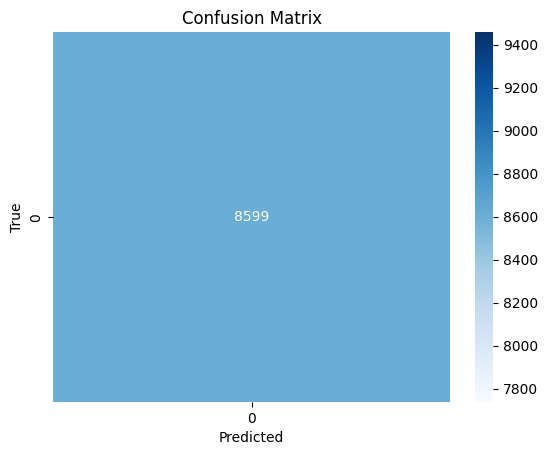

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8599

    accuracy                           1.00      8599
   macro avg       1.00      1.00      1.00      8599
weighted avg       1.00      1.00      1.00      8599



In [11]:
# Predykcje na zbiorze testowym
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Macierz pomyłek
conf_matrix = confusion_matrix(y_test, y_pred)

# Wyświetlenie macierzy
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Raport klasyfikacji
print(classification_report(y_test, y_pred))

269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


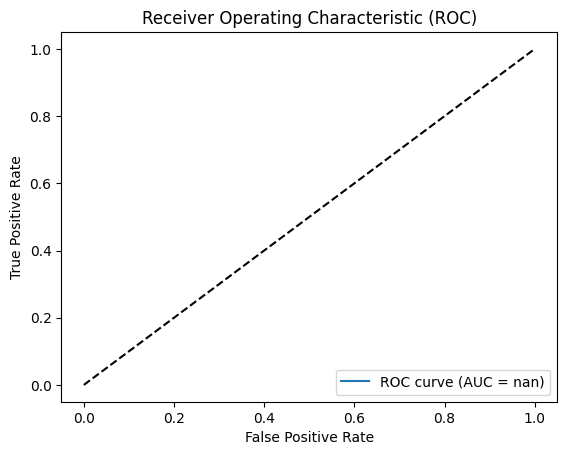

In [12]:
# Obliczanie wyników prawdopodobieństwa
y_pred_prob = model.predict(X_test)

# Wykres ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Wyświetlanie wykresu ROC
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # wykres linii losowej
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()